<a href="https://colab.research.google.com/github/Anantha-Rao12/IISER-Pune-India/blob/master/VGG_Transfer_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Step 1 : Download the dataset and unzip it into two directories

In [1]:
!wget https://ceb.nlm.nih.gov/proj/malaria/cell_images.zip

--2020-10-25 08:50:47--  https://ceb.nlm.nih.gov/proj/malaria/cell_images.zip
Resolving ceb.nlm.nih.gov (ceb.nlm.nih.gov)... 130.14.52.15, 2607:f220:41e:7052::15
Connecting to ceb.nlm.nih.gov (ceb.nlm.nih.gov)|130.14.52.15|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 353452851 (337M) [application/zip]
Saving to: ‘cell_images.zip’

cell_images.zip     100%[===================>] 337.08M   105MB/s    in 3.2s    

2020-10-25 08:50:50 (104 MB/s) - ‘cell_images.zip’ saved [353452851/353452851]



In [ ]:
!unzip cell_images.zip

In [3]:
## We install tree to look at the Directory structure after download
!apt install tree

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  tree
0 upgraded, 1 newly installed, 0 to remove and 21 not upgraded.
Need to get 40.7 kB of archives.
After this operation, 105 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tree amd64 1.7.0-5 [40.7 kB]
Fetched 40.7 kB in 0s (165 kB/s)
Selecting previously unselected package tree.
(Reading database ... 144611 files and directories currently installed.)
Preparing to unpack .../tree_1.7.0-5_amd64.deb ...
Unpacking tree (1.7.0-5) ...
Setting up tree (1.7.0-5) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...


In [4]:
# Show directory structure
!tree --dirsfirst --filelimit 10 /content/cell_images/

/content/cell_images/
├── Parasitized [13780 entries exceeds filelimit, not opening dir]
└── Uninfected [13780 entries exceeds filelimit, not opening dir]

2 directories, 0 files


In [6]:
# Tensorflow and Keras Utils for Deep Learning

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models, layers
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, ZeroPadding2D, Activation, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input

# Numpy for Matrix manipulations
import numpy as np

# Matplotlib and Seaborn for data visualization
import matplotlib.pyplot as plt
import seaborn as sns ; sns.set()

# Sklearn for performance metrics and Model auxillary functions
from sklearn.model_selection import train_test_split


print('Tensorflow version:',tf.__version__)

Tensorflow version: 2.3.0


## Step 2 : Data Preprocessing

In [10]:
data_directory = '/content/cell_images'
image_width = 100
image_height = 100
m = 27558
datagen = ImageDataGenerator(rescale=1/255.0, horizontal_flip=True, shear_range=0.2 )  

In [11]:
train_data_generator = datagen.flow_from_directory(directory='/content/cell_images', target_size=(image_width,image_height),
                                                   class_mode = 'binary', batch_size = m, shuffle=True, subset='training'
                                                   )

Found 27558 images belonging to 2 classes.


In [12]:
# We generate the X and Y datasets from the datagenerator object and preprocess them

X = train_data_generator[0][0]
Y = train_data_generator[0][1]
print(X.shape)
print(Y.shape)

(27558, 100, 100, 3)
(27558,)


## Step 3 : Building the model

In [13]:
# Load the VGG base model
vgg = VGG16(input_shape=[image_width, image_height] + [3], weights='imagenet', include_top=False)

58892288/58889256 [==============================] - 1s 0us/step


In [14]:
# Here, we freeze all layers and parameters in the VGG model
# This is done to prevent any loss of parameters present in the native VGG model

for layer in vgg.layers:
  layer.trainable = False

In [15]:
# We add a classification node after the VGG Model

classifier = Flatten()(vgg.output)
prediction = Dense(1, activation='sigmoid')(classifier)

In [16]:
# We build the model by combining the base VGG model and our classification node

model = Model(inputs=vgg.input, outputs=prediction)

In [17]:
model.compile(loss='binary_crossentropy',
              optimizer=keras.optimizers.Adam(lr=3e-4, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False),
              metrics=['accuracy'])

In [18]:
## Summary of the Model archtecture 
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100, 100, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 100, 100, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 100, 100, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 50, 50, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 50, 50, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 50, 50, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 25, 25, 128)      

In [19]:
results = model.fit(X,Y, epochs=10, validation_split = 0.2)

Epoch 1/10
689/689 [==============================] - 28s 40ms/step - loss: 0.3298 - accuracy: 0.8787 - val_loss: 0.2378 - val_accuracy: 0.9169
Epoch 2/10
689/689 [==============================] - 27s 40ms/step - loss: 0.2189 - accuracy: 0.9211 - val_loss: 0.1950 - val_accuracy: 0.9307
Epoch 3/10
689/689 [==============================] - 28s 40ms/step - loss: 0.1928 - accuracy: 0.9321 - val_loss: 0.1781 - val_accuracy: 0.9360
Epoch 4/10
689/689 [==============================] - 28s 41ms/step - loss: 0.1779 - accuracy: 0.9372 - val_loss: 0.1708 - val_accuracy: 0.9347
Epoch 5/10
689/689 [==============================] - 28s 41ms/step - loss: 0.1697 - accuracy: 0.9387 - val_loss: 0.1660 - val_accuracy: 0.9341
Epoch 6/10
689/689 [==============================] - 29s 41ms/step - loss: 0.1629 - accuracy: 0.9408 - val_loss: 0.1628 - val_accuracy: 0.9341
Epoch 7/10
689/689 [==============================] - 29s 42ms/step - loss: 0.1586 - accuracy: 0.9418 - val_loss: 0.1541 - val_accuracy:

## Step 5 : Plotting Model Performance

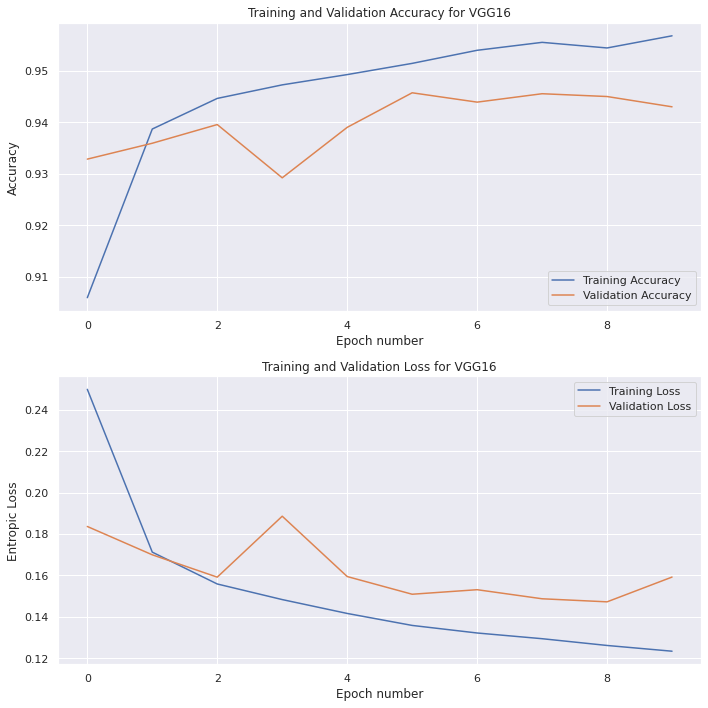

In [22]:
plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
plt.plot(results.history['accuracy'], label='Training Accuracy')
plt.plot(results.history['val_accuracy'], label='Validation Accuracy')
#plt.ylim([0.8, 1])
plt.legend(loc='lower right')
plt.xlabel('Epoch number' )
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy for VGG16')

plt.subplot(2, 1, 2)
plt.plot(results.history['loss'], label='Training Loss')
plt.plot(results.history['val_loss'], label='Validation Loss')
#plt.ylim([0, 1.0])
plt.legend(loc='upper right')
plt.title('Training and Validation Loss for VGG16')
plt.xlabel('Epoch number')
plt.ylabel('Entropic Loss')

plt.tight_layout()
plt.show()

In [ ]:
model.save('/content/drive/My Drive/CNN_malaria/Vgg_delema_detect.h5')